# Data Preprocessing

# Content

- Data Preprocessing
- Load data from postgres
- Data Information
- Data Manipulation
    - Missing Value Manipulation
    - Fixing missing values
    - Droping Duplicate values
- Show Data Description
- Outliers
    - Fix Outliers
- Data wrangling
- Save Cleaned Data

# Data Preprocessing

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

# Load Data From Postgres

In [3]:
import psycopg2 as pg

In [4]:
engine = pg.connect("dbname='postgres' user='postgres' host='127.0.0.1' port='5432' password='abel6464'")
df = pd.read_sql('select * from merged LIMIT 100000', con=engine)

In [5]:
df.head()

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN


# Data Information

In [6]:
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   game_key                                           100000 non-null  object        
 1   campaign_id                                        100000 non-null  object        
 2   type                                               100000 non-null  object        
 3   width                                              100000 non-null  object        
 4   height                                             99998 non-null   object        
 5   creative_id                                        100000 non-null  object        
 6   auction_id                                         100000 non-null  object        
 7   browser_ts                                         100000 non-null  datetime64[ns]
 8   geo_c

In [7]:
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


browser_ts                      99501
auction_id                      83071
site_name                        5779
creative_id                       312
game_key                          180
campaign_name                      46
campaign_id                        46
browser                            31
Description                        27
Submission Date                    27
startdate                          22
enddate                            21
Gross Cost/Budget                  19
Volume Agreed                      19
Net Cost                           18
Buy Rate (CPE)                     16
Campaign Objectives                15
Serving Location(s)                14
text_clickthr                      12
labels_engagement                  12
colors_engagement_proportion       12
labels_clickthr                    12
geo_country                        12
colors_clickthr_proportion         11
colors_engagement_green            11
colors_engagement_luminosity       11
text_engagem

In [8]:
df.shape

(100000, 54)

# Data Manipulation

## Missing Value Manipulation

In [9]:
preprocess.colums_WithMissingValue()

['height',
 'device_type',
 'browser',
 'Delivery Requirements (Black/Audience/White List)',
 'Buy Rate (CPE)',
 'Volume Agreed',
 'Gross Cost/Budget',
 'Agency Fee',
 'Percentage',
 'Flat Fee',
 'Net Cost',
 'labels_engagement',
 'labels_clickthr',
 'text_engagement',
 'text_clickthr',
 'colors_engagement_red',
 'colors_engagement_green',
 'colors_engagement_blue',
 'colors_engagement_proportion',
 'colors_engagement_saturation',
 'colors_engagement_luminosity',
 'colors_clickthr_red',
 'colors_clickthr_green',
 'colors_clickthr_blue',
 'colors_clickthr_proportion',
 'colors_clickthr_saturation',
 'colors_clickthr_luminosity',
 'videosd',
 'eng_type',
 'direction',
 'adunit_sizex',
 'adunit_sizey']

In [10]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
game_key,0,0.0 %
campaign_id,0,0.0 %
type,0,0.0 %
width,0,0.0 %
height,2,0.0 %
creative_id,0,0.0 %
auction_id,0,0.0 %
browser_ts,0,0.0 %
geo_country,0,0.0 %
site_name,0,0.0 %


Text(0, 0.5, 'Features')

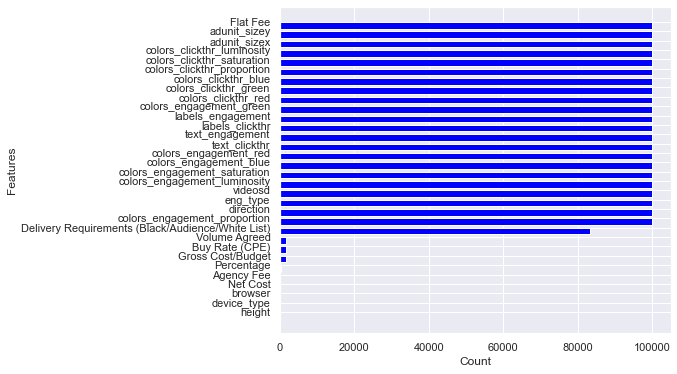

In [11]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = df.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

---
- We will remove missing values which have > 80% missing records
- We have missing values of almost >90% that came from extracted computer vision json data.
- There aren't much computer vision data collected for the same game key as in the inventory dataset. That might be some of the limitations of this dataset.
---

## Fixing missing values

In [12]:
# Droping missing values which are greater than >80%
columns_drop = ['Flat Fee', 'Delivery Requirements (Black/Audience/White List)', 
                'labels_engagement', 'labels_clickthr', 'text_engagement', 
                'text_clickthr', 'colors_engagement_red', 
                'colors_engagement_green', 'colors_engagement_blue', 
                'colors_engagement_proportion', 'colors_engagement_saturation', 
                'colors_engagement_luminosity', 'colors_clickthr_red', 
                'colors_clickthr_green', 'colors_clickthr_blue', 'colors_clickthr_proportion', 
                'colors_clickthr_saturation', 'colors_clickthr_luminosity',
                'videosd', 'eng_type', 'direction', 'adunit_sizex', 'adunit_sizey']
# drop the >80% missing value columns
df.drop(columns_drop, axis=1, inplace=True)

In [13]:
df['height'] = df['height'].replace(['%', 'a'], 0)
df['width'] = df['width'].replace(['%', 'a'], 0)
df['Agency Fee'] = df['Agency Fee'].replace(['Percentage', '%'], 0)
df['Agency Fee'] = df['Agency Fee'].replace(['Flat Fee', '%'], 0)

In [14]:
df['device_type'].fillna(df['device_type'].mode()[0], inplace = True)
df['browser'].fillna(df['browser'].mode()[0], inplace = True)
# 
df['Volume Agreed'].fillna(df['Volume Agreed'].median(), inplace = True)
df['Buy Rate (CPE)'].fillna(df['Buy Rate (CPE)'].median(), inplace = True)
df['Gross Cost/Budget'].fillna(df['Gross Cost/Budget'].median(), inplace = True)
df['Percentage'].fillna(df['Percentage'].median(), inplace = True)
df['Net Cost'].fillna(df['Net Cost'].median(), inplace = True)
df['Percentage'].fillna(df['Percentage'].median(), inplace = True)
# df['Agency Fee'].fillna(df['Agency Fee'].median(), inplace = True)

# Droping Duplicate values

In [15]:
# Duplicate
df[df.duplicated()].index

Int64Index([ 3363,  8014,  9190,  9192, 12413, 12415, 14130, 14283, 15875,
            16233, 16257, 20098, 23538, 24732, 27618, 28123, 28940, 30794,
            30821, 31035, 31848, 33228, 38043, 38149, 43888, 43892, 43911,
            43924, 44754, 44784, 47675, 47746, 48053, 49088, 49148, 50198,
            61683, 61977, 62732, 69102, 69107, 69133, 71242, 74211, 75119,
            75464, 75488, 75509, 81501, 84451, 86030, 86032, 88063, 99037],
           dtype='int64')

In [16]:
preprocess.drop_duplicates()

In [17]:
# Duplicate
df[df.duplicated()].index

Int64Index([], dtype='int64')

# Show Data Description

In [18]:
preprocess.show_data_description()

,Buy Rate (CPE),Volume Agreed,Gross Cost/Budget,Agency Fee,Percentage,Net Cost
count,99946.000000,9.994600e+04,9.994600e+04,99944.0,99946.000000,9.994600e+04
mean,2.482227,1.575768e+05,7.502082e+04,0.0,7.742681,7.127246e+04
std,6.170136,2.068815e+05,8.208840e+04,0.0,7.491905,8.090070e+04
min,0.270000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00
25%,0.350000,7.392000e+03,2.541168e+04,0.0,0.000000,1.980000e+04
50%,0.400000,6.482600e+04,5.000000e+04,0.0,15.000000,5.000000e+04
75%,0.490000,2.142857e+05,1.300000e+05,0.0,15.000000,1.105000e+05
max,28.000000,5.963333e+06,1.789000e+06,0.0,15.000000,1.789000e+06


In [19]:
preprocess.show_datatypes()

game_key                                       object
campaign_id                                    object
type                                           object
width                                          object
height                                         object
creative_id                                    object
auction_id                                     object
browser_ts                             datetime64[ns]
geo_country                                    object
site_name                                      object
platform_os                                    object
device_type                                    object
browser                                        object
campaign_name                                  object
Submission Date                        datetime64[ns]
Description                                    object
Campaign Objectives                            object
kpis                                           object
Placement(s)                

In [20]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{df.shape}')

Shapes of our datasets
-----------------------
Training dataset:(99946, 31)


In [21]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Buy Rate (CPE),99946.000000,2.482227,6.170136,0.270000,0.350000,0.400000,0.490000,28.000000
Volume Agreed,99946.000000,157576.813061,206881.470915,0.000000,7392.000000,64826.000000,214285.710000,5963333.330000
Gross Cost/Budget,99946.000000,75020.816928,82088.404183,0.000000,25411.680000,50000.000000,130000.000000,1789000.000000
Agency Fee,99944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage,99946.000000,7.742681,7.491905,0.000000,0.000000,15.000000,15.000000,15.000000
Net Cost,99946.000000,71272.458240,80900.696510,0.000000,19800.000000,50000.000000,110500.000000,1789000.000000


# Outliers

In [22]:
from data_exploration import exploration
exploration = exploration()

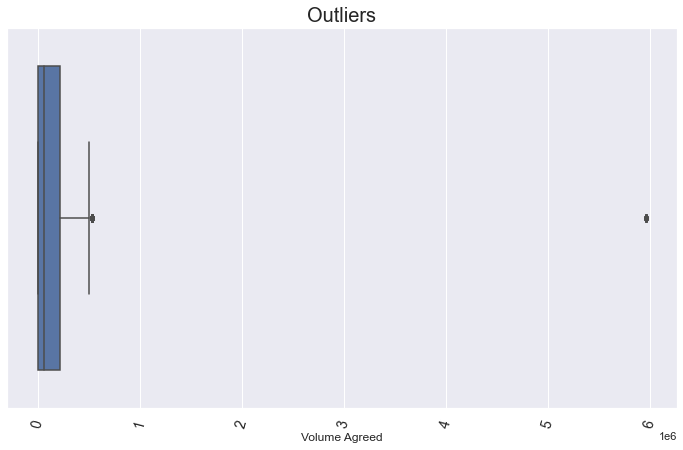

In [23]:
exploration.plot_box(df, "Volume Agreed", "Outliers")

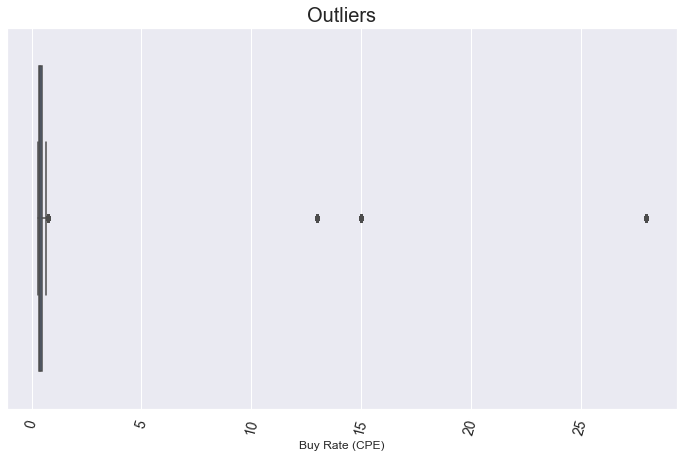

In [24]:
exploration.plot_box(df, "Buy Rate (CPE)", "Outliers")

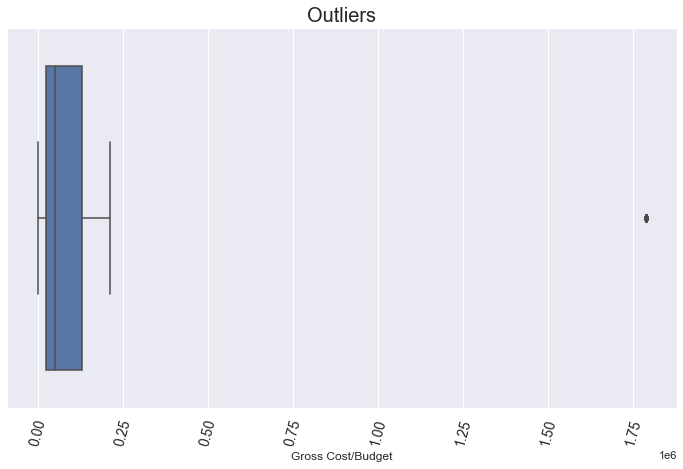

In [25]:
exploration.plot_box(df, "Gross Cost/Budget", "Outliers")

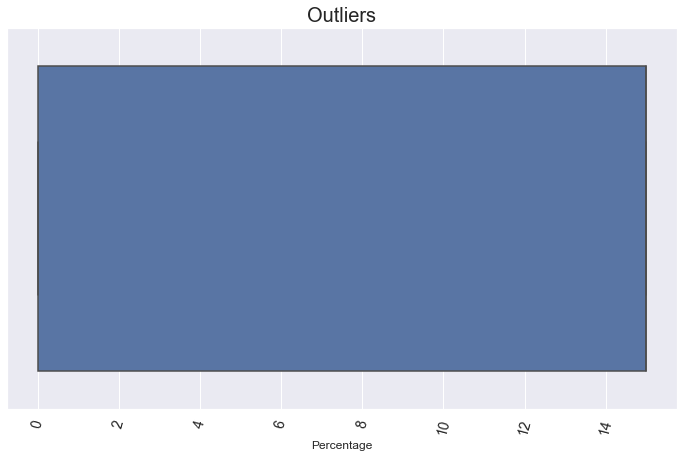

In [26]:
exploration.plot_box(df, "Percentage", "Outliers")

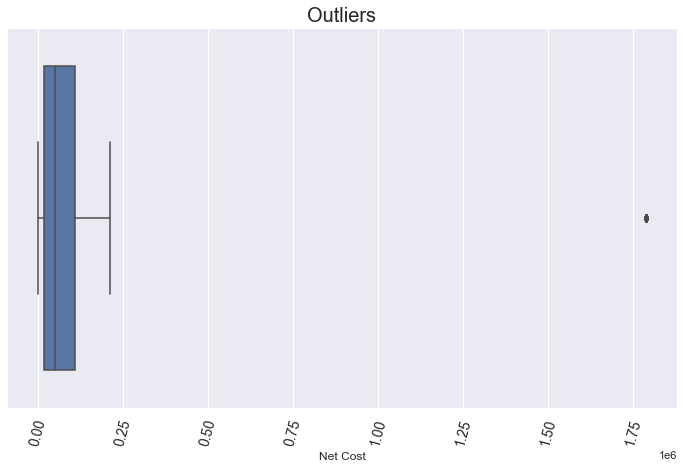

In [27]:
exploration.plot_box(df, "Net Cost", "Outliers")

# Fix Outliers

In [28]:
from data_manipulator import DataCleaner
manipulator = DataCleaner(df)

In [29]:
columns = ['Buy Rate (CPE)', 'Volume Agreed',
'Gross Cost/Budget', 'Percentage','Net Cost']

In [30]:
manipulator.replace_outlier_with_median(df, columns)

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,Serving Location(s),Black/white/audience list included?,Cost Centre,currency,Buy Rate (CPE),Volume Agreed,Gross Cost/Budget,Agency Fee,Percentage,Net Cost
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,adunit-van-cleef-and-arpels-frivole-wave-unit2...,mdanl1k,impression,320,480,4kuznk5y,8c19791b-214c-4102-896d-83e235959c58,2021-01-15 17:13:51.262,Singapore,www.whowhatwear.com,...,Singapore,Black/white/audience list included,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93
99996,adunit-van-cleef-and-arpels-frivole-wave-unit1...,mdanl1k,impression,320,480,w6302n4g,c72b26d5-1ab5-4a5c-830c-370b9a26fcae,2021-01-15 17:13:55.685,Singapore,www.whowhatwear.com,...,Singapore,Black/white/audience list included,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93
99997,adunit-van-cleef-and-arpels-frivole-wave-unit1...,mdanl1k,impression,320,480,w6302n4g,7bfaa8ac-0726-4f37-9ae6-aaa5d9253358,2021-01-15 17:13:57.514,Singapore,www.whowhatwear.com,...,Singapore,Black/white/audience list included,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93
99998,adunit-van-cleef-and-arpels-frivole-wave-unit1...,mdanl1k,first_dropped,320,480,w6302n4g,7bfaa8ac-0726-4f37-9ae6-aaa5d9253358,2021-01-15 17:13:58.559,Singapore,www.whowhatwear.com,...,Singapore,Black/white/audience list included,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93


# Data Wrangling

In [31]:
manipulator.separate_date_time_column('browser_ts', 'browser_eng_')

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,Cost Centre,currency,Buy Rate (CPE),Volume Agreed,Gross Cost/Budget,Agency Fee,Percentage,Net Cost,browser_eng_Date,browser_eng_Time
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03,2021-01-01,19:55:20.291000
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03,2021-01-01,19:55:20.298000
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03,2021-01-05,00:21:39.693000
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03,2021-01-06,09:30:44.188000
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,SGP,USD,0.28,242185.0,67811.80,0.0,15.0,57640.03,2021-01-06,09:30:45.047000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,adunit-van-cleef-and-arpels-frivole-wave-unit2...,mdanl1k,impression,320,480,4kuznk5y,8c19791b-214c-4102-896d-83e235959c58,2021-01-15 17:13:51.262,Singapore,www.whowhatwear.com,...,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93,2021-01-15,17:13:51.262000
99996,adunit-van-cleef-and-arpels-frivole-wave-unit1...,mdanl1k,impression,320,480,w6302n4g,c72b26d5-1ab5-4a5c-830c-370b9a26fcae,2021-01-15 17:13:55.685,Singapore,www.whowhatwear.com,...,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93,2021-01-15,17:13:55.685000
99997,adunit-van-cleef-and-arpels-frivole-wave-unit1...,mdanl1k,impression,320,480,w6302n4g,7bfaa8ac-0726-4f37-9ae6-aaa5d9253358,2021-01-15 17:13:57.514,Singapore,www.whowhatwear.com,...,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93,2021-01-15,17:13:57.514000
99998,adunit-van-cleef-and-arpels-frivole-wave-unit1...,mdanl1k,first_dropped,320,480,w6302n4g,7bfaa8ac-0726-4f37-9ae6-aaa5d9253358,2021-01-15 17:13:58.559,Singapore,www.whowhatwear.com,...,SGP,SGD,0.63,40336.0,25411.68,0.0,15.0,21599.93,2021-01-15,17:13:58.559000


In [32]:
df.drop('browser_ts', axis=1, inplace=True)

# Saving new processed File

In [33]:
df.to_csv('../data/processed_incl_missing.csv', index=False)